In [1]:
import numpy as np
import matplotlib.pyplot as plt
from base_model_utils import import_scaled_data

In [25]:
def get_data(seedling):
    # import reading data
    data = import_scaled_data()

    # import prediction data
    prediction_data = np.load(f'output/data_{seedling}.npz')
    preds = prediction_data['preds']
    weights = prediction_data['weights']
    bm_1 = prediction_data['bm_1']
    bm_2 = prediction_data['bm_2']

    # fix length
    length = min([len(l) for l in [data, preds, weights, bm_1, bm_2]])
    length = length - 2993
    data = data[-length:]
    preds = preds[-length:, 0]
    weights = weights[-length:]
    bm_2 = bm_2[-length:, 0]
    bm_1 = bm_1[-length:, 0]

    return data, preds, weights, bm_1, bm_2



In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


def show_stuffs(actual_values, predicted_values):
    # Calculate errors
    errors = actual_values - predicted_values
    mae = mean_absolute_error(actual_values, predicted_values)
    mse = mean_squared_error(actual_values, predicted_values)
    rmse = np.sqrt(mse)

    # Time Series Plot
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values, label='Actual')
    plt.plot(predicted_values, label='Forecast')
    plt.title('Time Series Forecast vs Actual')
    plt.legend()
    plt.show()
    
    # Error Time Series Plot
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label='Forecast Error')
    plt.title('Time Series Forecast Error')
    plt.legend()
    plt.show()
    
    # Histogram of Forecast Errors
    plt.figure(figsize=(6, 4))
    plt.hist(errors, bins=20, edgecolor='black')
    plt.title('Histogram of Forecast Errors')
    plt.show()

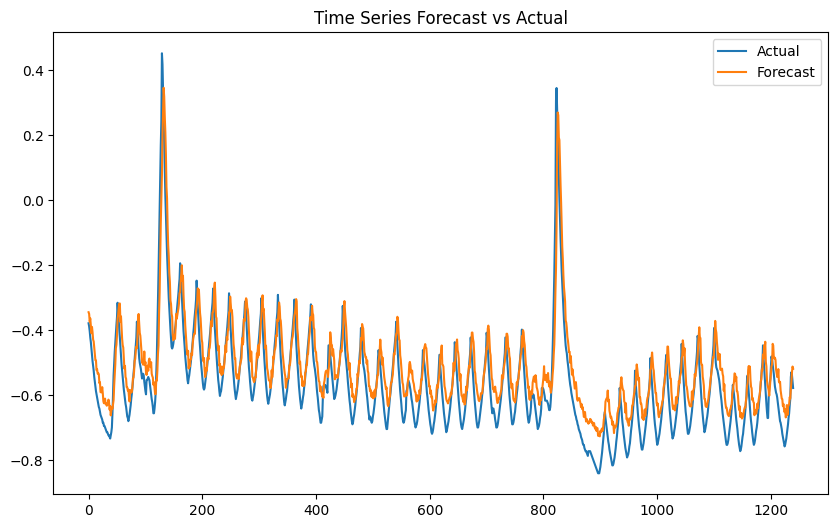

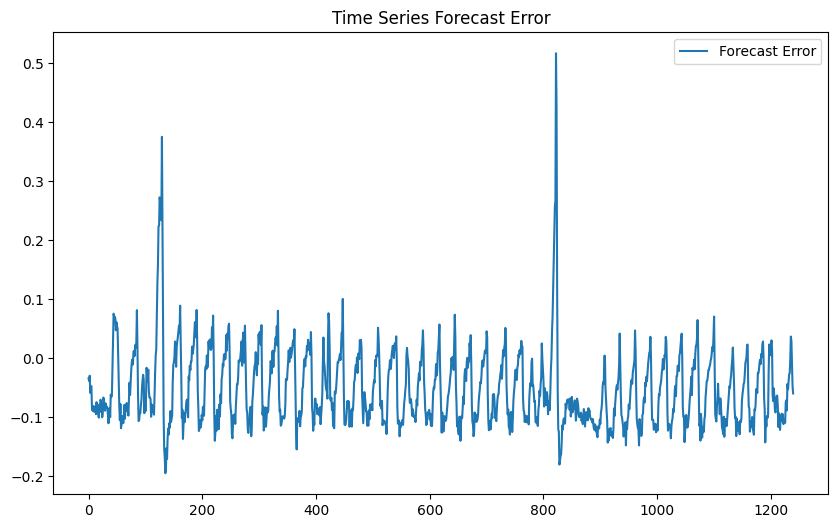

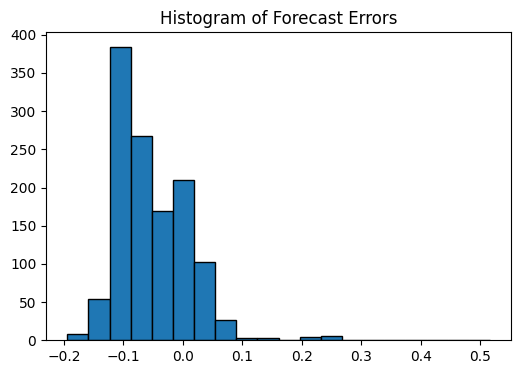

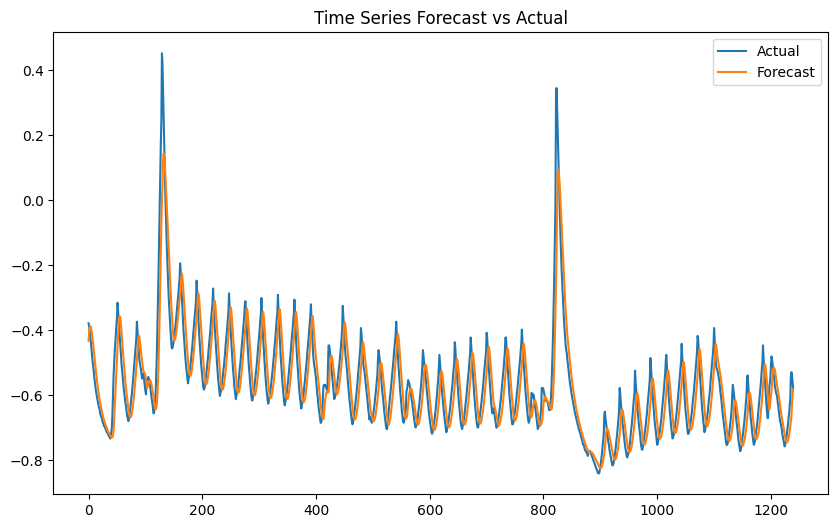

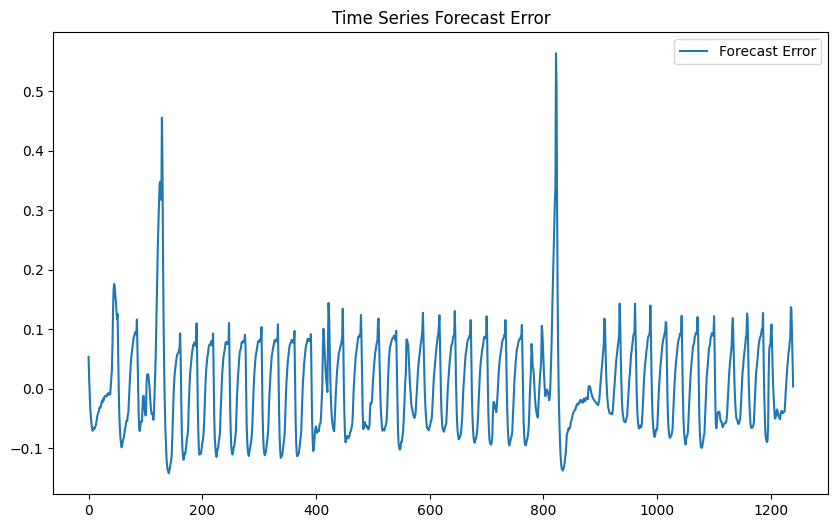

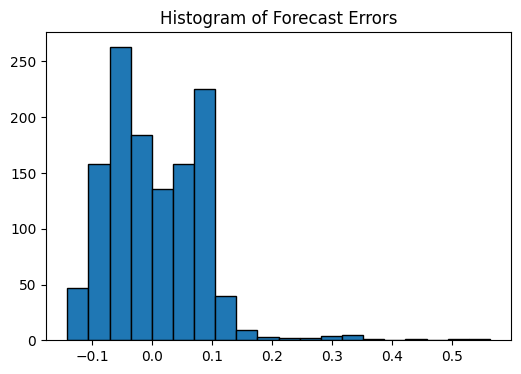

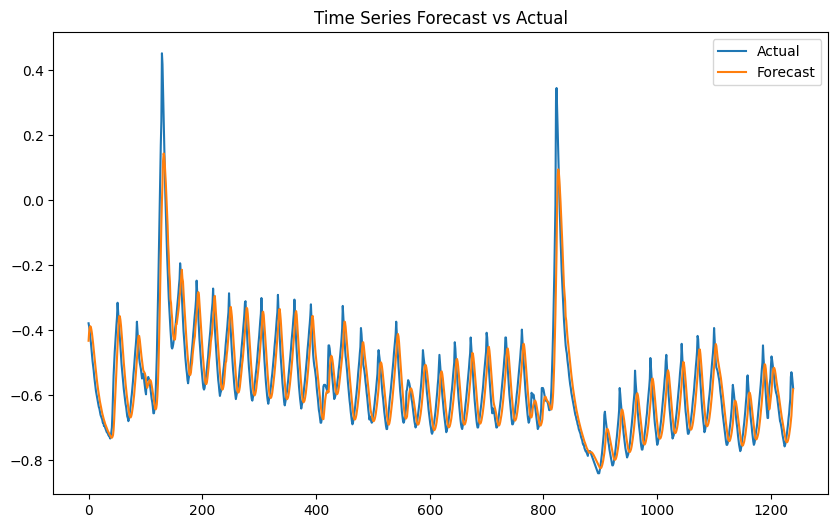

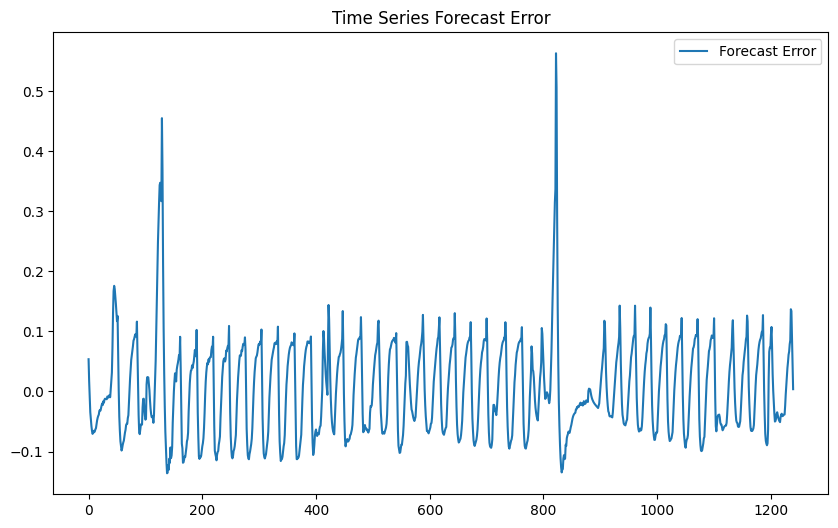

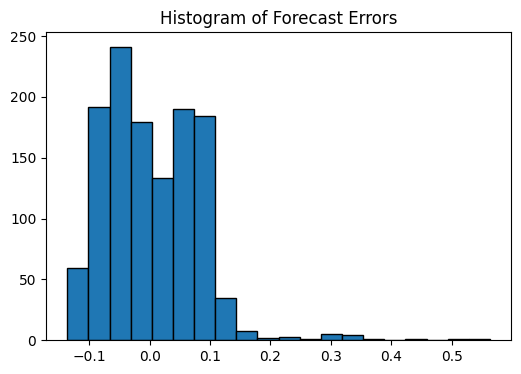

In [31]:
data, preds, weights, bm_1, bm_2 = get_data(8)
show_stuffs(data, bm_1)
show_stuffs(data, bm_2)
show_stuffs(data, preds)

In [6]:
def plot_data_directly():
    # plot
    plt.plot(data, label="data", color='black')
    plt.plot(bm_1, label="bm_1", color='blue')
    plt.plot(bm_2, label="bm_2", color='green')
    plt.plot(preds, label="preds", color='red')
    plt.plot(weights[:, 0], label="weights", color='gray')

    # labeling
    plt.xlabel('15 minute time steps')
    plt.ylabel('Degrees F')
    plt.title('Synthetic Model Predictions')
    plt.legend()

    # Display the plot
    plt.show()